In [2]:
import lucem_illud as lucem_illud_2020 #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

In [5]:
exec_orders = pd.read_csv('/Users/lilygrier/Documents/Grad_School/Computational Content Analysis/full_exec_orders_text.csv')

In [6]:
exec_orders

,Unnamed: 0,Unnamed: 0.1,citation,document_number,end_page,html_url,pdf_url,type,subtype,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number,president,order_text
0,0,0.0,82 FR 8115,2017-01623,8129,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/23/2017,01/17/2017,8115,"Amending the Civil Service Rules, Executive Or...","Amends: EO 13467, June 30, 2008; EO 13488, Jan...",13764.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
1,1,1.0,82 FR 7619,2017-01487,7620,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7619,Providing an Order of Succession Within the De...,"Revokes: EO 13557, November 4, 2010\nRevoked b...",13762.0,barack_obama,"\n\n\nExecutive Order 13762 of January 13, 201..."
2,2,2.0,82 FR 7621,2017-01489,7622,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7621,Providing an Order of Succession Within the En...,"Revokes: EO 13737, August 12, 2016",13763.0,barack_obama,"\n\n\nExecutive Order 13763 of January 13, 201..."
3,3,3.0,82 FR 5331,2017-01197,5333,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/18/2017,01/13/2017,5331,Recognizing Positive Actions by the Government...,"Revokes in part: EO 13067, November 3, 1997\nR...",13761.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
4,4,4.0,82 FR 5321,2017-01164,5322,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/17/2017,01/12/2017,5321,Amending Executive Order 11016 To Update Eligi...,"Amends: EO 11016, April 25, 1962",13758.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1071,NaN,86 FR 7029,2021-01762,7035,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7029,Ethics Commitments by Executive Branch Personnel,NaN,13989.0,joe_biden,\n\nTitle 3—\nThe President\n\nExecutive Order...
1070,1072,NaN,86 FR 7037,2021-01765,7043,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7037,Protecting Public Health and the Environment a...,NaN,13990.0,joe_biden,"\n\n\nExecutive Order 13990 of January 20, 202..."
1071,1073,NaN,86 FR 7045,2021-01766,7048,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7045,Protecting the Federal Workforce and Requiring...,NaN,13991.0,joe_biden,"\n\n\nExecutive Order 13991 of January 20, 202..."
1072,1074,NaN,86 FR 7049,2021-01767,7050,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7049,Revocation of Certain Executive Orders Concern...,NaN,13992.0,joe_biden,"\n\n\nExecutive Order 13992 of January 20, 202..."


In [47]:
targetDF = exec_orders
textColumn = 'order_text'
numCategories = 5
numClusters = 5

In [48]:
# tf idf vectorizing
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.4, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
TFVects = TFVectorizer.fit_transform(targetDF[textColumn])

# run k means
KM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
KM.fit(TFVects)


terms = TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = KM.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 council
 committee
 board
 commission
 advisory
 members
 chair
 education
 labor
 report


Cluster 1:
 force
 task
 health
 defense
 service
 subsection
 homeland
 december
 programs
 regulations


Cluster 2:
 property
 blocked
 interests
 ieepa
 persons
 treasury
 50
 emergency
 entity
 iran


Cluster 3:
 schedule
 pay
 hereto
 hereof
 rates
 attached
 basic
 schedules
 payments
 judges


Cluster 4:
 register
 presidential
 documents
 page
 volume
 1996
 1997
 1998
 1995
 tuesday




In [49]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(exec_orders['president'], KM.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(exec_orders['president'], KM.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(exec_orders['president'], KM.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(exec_orders['president'], KM.labels_)))

For our clusters:
Homogeneity: 0.122
Completeness: 0.154
V-measure: 0.136
Adjusted Rand Score: 0.047


In [50]:
# tf idf vectorizing
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.3, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
TFVects = TFVectorizer.fit_transform(targetDF[textColumn])

# run k means
KM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
KM.fit(TFVects)


terms = TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = KM.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 task
 force
 attorney
 chair
 recommendations
 environmental
 american
 local
 veterans
 interagency


Cluster 1:
 property
 blocked
 interests
 ieepa
 treasury
 persons
 50
 emergency
 entity
 iran


Cluster 2:
 schedule
 pay
 hereto
 hereof
 rates
 attached
 basic
 schedules
 payments
 37


Cluster 3:
 register
 documents
 page
 volume
 1997
 1996
 1998
 1995
 tuesday
 1999


Cluster 4:
 committee
 board
 commission
 advisory
 homeland
 programs
 assistant
 december
 labor
 administrator




In [51]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(exec_orders['president'], KM.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(exec_orders['president'], KM.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(exec_orders['president'], KM.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(exec_orders['president'], KM.labels_)))

For our clusters:
Homogeneity: 0.143
Completeness: 0.212
V-measure: 0.170
Adjusted Rand Score: 0.072


In [52]:
# perform PCA and visualize
PCA = sklearn.decomposition.PCA(n_components = 2).fit(TFVects.toarray())
reducedPCA_data = PCA.transform(TFVects.toarray())

colors = list(plt.cm.rainbow(np.linspace(0,1, numCategories)))
colors_p = [colors[l] for l in KM.labels_]

In [53]:
components = PCA.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

In [54]:
colordict = {
'barack_obama': 'red',
'george_w_bush': 'orange',
'william_j_clinton': 'green',
'donald_trump': 'blue',
'joe_biden': 'purple'
    }
colors = [colordict[c] for c in exec_orders['president']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('barack_obama', 'red'), ('george_w_bush', 'orange'), ('william_j_clinton', 'green'), ('donald_trump', 'blue'), ('joe_biden', 'purple')])


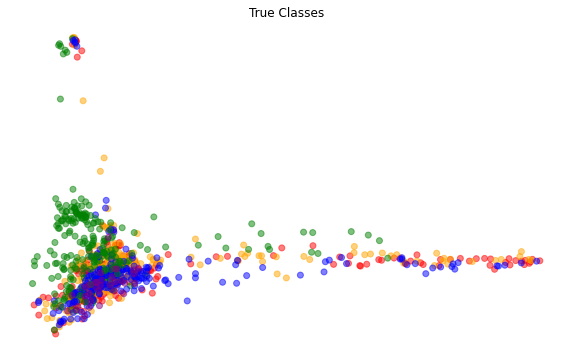

In [55]:

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()